In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Alco = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)

In [3]:
Alco.index.freq='MS'

<Axes: xlabel='DATE'>

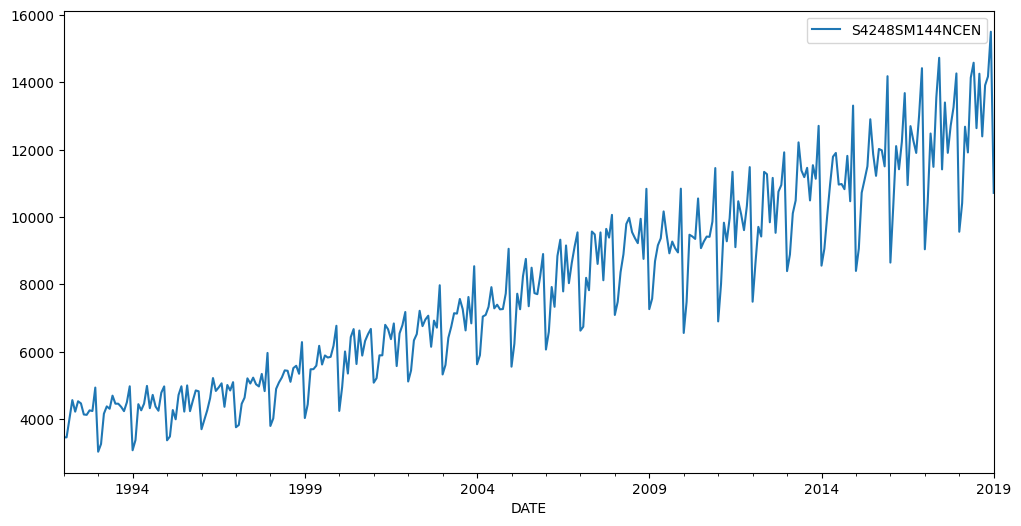

In [4]:
Alco.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
train = Alco.iloc[:300]
test = Alco.iloc[300:]

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
from keras.preprocessing.sequence import TimeseriesGenerator

In [8]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
model.fit(generator,epochs=100)

Epoch 1/100
288/288 [==============================] - 3s 3ms/step - loss: 0.0199
Epoch 2/100
288/288 [==============================] - 2s 5ms/step - loss: 0.0088
Epoch 3/100
288/288 [==============================] - 1s 4ms/step - loss: 0.0085
Epoch 4/100
288/288 [==============================] - 2s 6ms/step - loss: 0.0083
Epoch 5/100
288/288 [==============================] - 2s 6ms/step - loss: 0.0074
Epoch 6/100
288/288 [==============================] - 2s 7ms/step - loss: 0.0068
Epoch 7/100
288/288 [==============================] - 2s 7ms/step - loss: 0.0056
Epoch 8/100
288/288 [==============================] - 2s 5ms/step - loss: 0.0048
Epoch 9/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 10/100
288/288 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 11/100
288/288 [==============================] - 1s 5ms/step - loss: 0.0028
Epoch 12/100
288/288 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 13/100


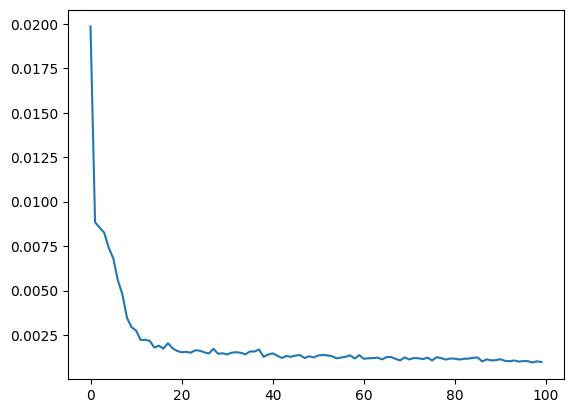

In [11]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [13]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)


1/1 [==============================] - 0s 21ms/step


array([[0.55445683]], dtype=float32)

In [14]:
scaled_test[0]

array([0.52783143])

In [15]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [16]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

C:\Users\vinan\AppData\Local\Temp\ipykernel_6780\4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

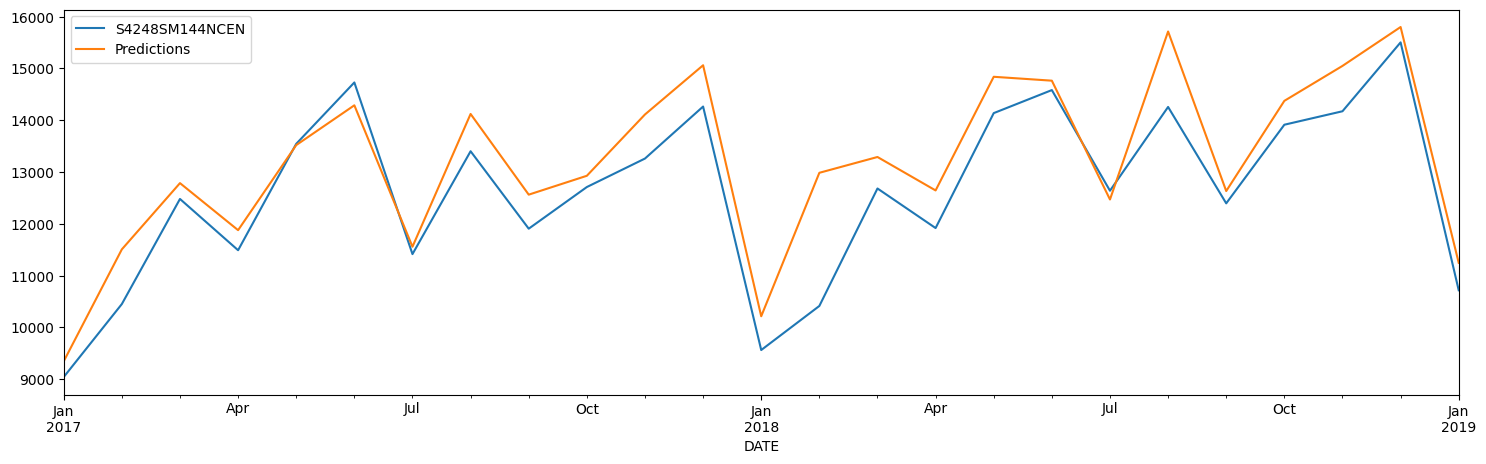

In [17]:
test.plot(figsize=(18,5))

In [19]:

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['S4248SM144NCEN'], test['Predictions']))
print(rmse)

800.8554294331692
